<a href="https://colab.research.google.com/github/Devansh1093/Devansh1093/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
# Convert MNIST Images file into a Tensor of 4-Dimensions(# of images,Height,Width,Color Channel)
transform = transforms.ToTensor()


In [ ]:
#Train Data
train_data = datasets.MNIST(root='cnndata', train=True, download=True, transform=transform)
#Test Data
test_data = datasets.MNIST(root='cnndata', train=False, download=True, transform=transform)

train_data


100%|██████████| 9.91M/9.91M [00:00<00:00, 55.5MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.60MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 14.0MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.43MB/s]


Dataset MNIST
    Number of datapoints: 60000
    Root location: cnndata
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
#Create a small batch size for images
train_loader =  DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)



In [ ]:
#Define our CNN Model
#Describe convolutional layer and what it's doing(2 convolutional layer)
conv1 = nn.Conv2d(1,6,3,1)
conv2 = nn.Conv2d(6,16,3,1)



In [ ]:
#Grab 1 MNIST record/image
for i, (X_train, y_train) in enumerate(train_data):
    break


In [ ]:
X_train.shape

torch.Size([1, 28, 28])

In [ ]:
x= X_train.view(1,1,28,28)
x.shape

torch.Size([1, 1, 28, 28])

In [ ]:
# 1st convolution
# 1 is single image , 6 is the filters we asked for, 26*26
# why isn't it 28*28 because we have not used padding so there are some drop of pixels

x= F.relu(conv1(x))
x.shape

torch.Size([1, 6, 26, 26])

In [ ]:
#pass through the pooling layer
x= F.max_pool2d(x,2,2)  #kernel =2 , stride = 2
x.shape

torch.Size([1, 6, 13, 13])

In [ ]:
#2nd Convolution Layer
x = F.relu(conv2(x)) # again no padding so there is loss of 2 piexel hence 11
x.shape

torch.Size([1, 16, 11, 11])

In [ ]:
#Pooling layer
X = F.max_pool2d(x,2,2) # 11/2 = 5.5 we will round down because we cannot invent new data to round up
X.shape

torch.Size([1, 16, 5, 5])

In [ ]:
#Model Class
class CNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1,6,3,1)
    self.conv2 = nn.Conv2d(6,16,3,1)
    #Fully connected layer
    self.fc1 = nn.Linear(5*5*16,120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)
  def forward(self,x):
    # First Pass
    x = F.relu(self.conv1(x))
    x = F.max_pool2d(x,2,2)
    # Second Pass
    x = F.relu(self.conv2(x))
    x = F.max_pool2d(x,2,2)
    #Flatten
    x = x.view(-1,5*5*16)
   #Fully connected Layers
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return F.log_softmax(x,dim=1)

In [ ]:
#Create an Instance of our Model
torch.manual_seed(41)
model = CNN()
model

CNN(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
#Loss function Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)


In [ ]:
import time
start = time.time()
# Create Variables
epochs =5
train_losses = []
test_losses = []
train_correct = []
test_correct = []


# For loop for epooch
for i in range(epochs):
  trn_corr = 0
  tst_corr = 0
  #Train
  for b, (X_train, y_train) in enumerate(train_loader):
    b+=1
    y_pred = model(X_train)
    loss = criterion(y_pred,y_train)
    predicted = torch.max(y_pred.data,1)[1]
    batch_corr = (predicted == y_train).sum()
    trn_corr += batch_corr
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  #Print out some result
    if b%600 == 0:
        print(f'epoch: {i}  loss:{loss.item()}')
train_losses.append(loss)
train_correct.append(trn_corr)
  # Test
with torch.no_grad():
    for b, (X_test, y_test) in enumerate(test_loader):
      y_val = model(X_test)
      predicted = torch.max(y_val.data,1)[1]
loss = criterion(y_val,y_test)
tst_corr += (predicted == y_test).sum()
test_losses.append(loss)
test_correct.append(tst_corr)


current = time.time()
total = current + start
print(f'Training Took: {total/60} minutes!')


epoch: 0  loss:0.1623610556125641
epoch: 0  loss:0.1502392590045929
epoch: 0  loss:0.4744560718536377
epoch: 0  loss:0.14238706231117249
epoch: 0  loss:0.007758188061416149
epoch: 0  loss:0.3836284875869751
epoch: 0  loss:0.0038223876617848873
epoch: 0  loss:0.0021286322735249996
epoch: 0  loss:0.0569545142352581
epoch: 0  loss:0.00038789428072050214
epoch: 1  loss:0.06289136409759521
epoch: 1  loss:0.010614877566695213
epoch: 1  loss:0.03243611007928848
epoch: 1  loss:0.012448625639081001
epoch: 1  loss:0.000640809943433851
epoch: 1  loss:0.0020938280504196882
epoch: 1  loss:0.3140248656272888
epoch: 1  loss:0.020231451839208603
epoch: 1  loss:0.0031914091669023037
epoch: 1  loss:0.0009488927898928523
epoch: 2  loss:0.04242878407239914
epoch: 2  loss:0.000786997377872467
epoch: 2  loss:0.0004456916940398514
epoch: 2  loss:0.0021735907066613436
epoch: 2  loss:6.313459743978456e-05
epoch: 2  loss:0.0014708992093801498
epoch: 2  loss:8.743518264964223e-05
epoch: 2  loss:0.001117409206926

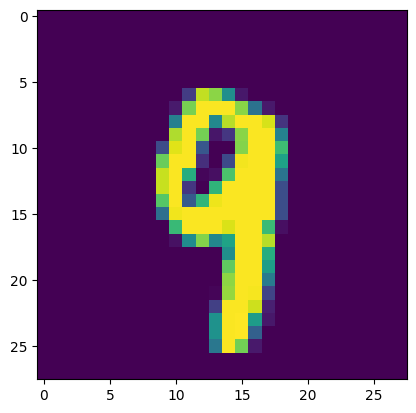

In [ ]:
test1= test_data[4143][0].reshape(28,28)
plt.imshow(test1)


In [ ]:
#pass image through model
model.eval()
with torch.no_grad():
  new = model(test_data[4143][0].view(1,1,28,28))


In [ ]:
new.argmax()

tensor(9)